In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\Users\hrock\Downloads\anemia.csv')

In [3]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [5]:
df.shape

(1421, 6)

In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

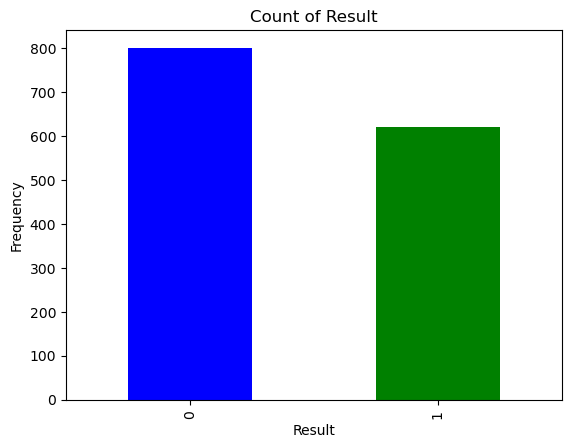

In [7]:
results = df['Result'].value_counts()
results.plot(kind='bar', color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [8]:
from sklearn.utils import resample
majorclass = df[df['Result'] == 0]
minorclass = df[df['Result'] == 1]

major_downsample = resample(majorclass,replace=False, n_samples=len(minorclass) ,random_state = 42)

df = pd.concat([major_downsample,minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


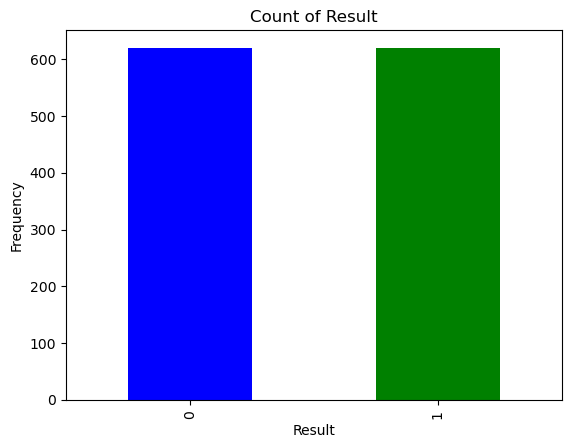

In [9]:
#VisualAnalysis
results_balanced = df['Result'].value_counts()
results_balanced.plot(kind='bar', color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [10]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


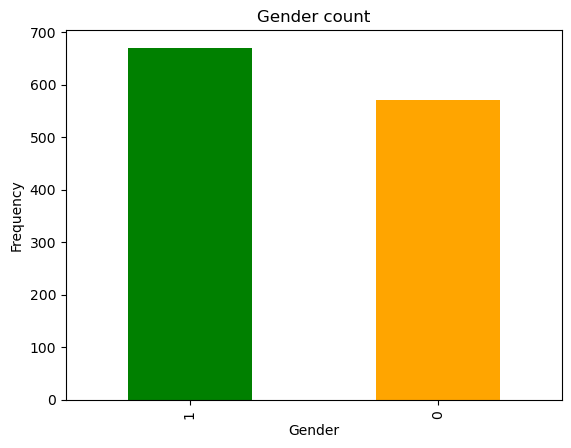

In [11]:
#Univariate
output = df['Gender'].value_counts()
output.plot(kind='bar', color=['green','orange'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender count')
plt.show()

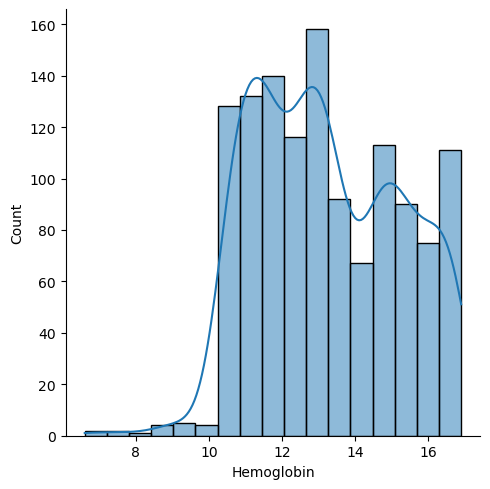

In [12]:
sns.displot(df['Hemoglobin'],kde = True)

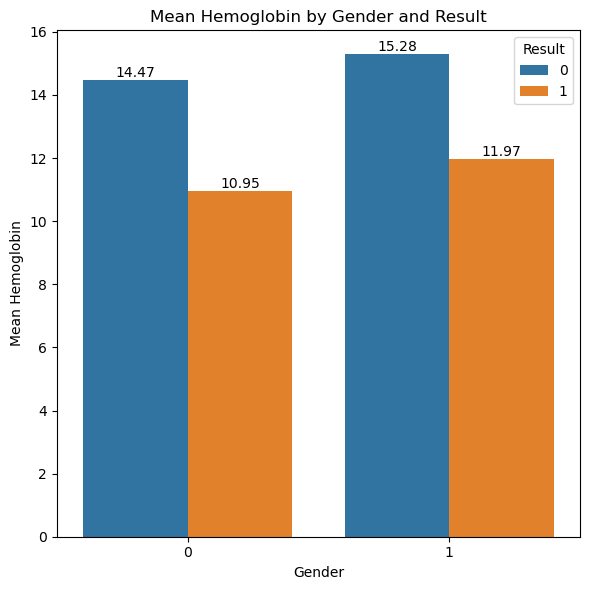

In [13]:
#Bivariate
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x='Gender',
    y='Hemoglobin',
    hue='Result',
    data=df,         
    errorbar=None,          
    estimator='mean' 
)
ax.set_xlabel('Gender')
ax.set_ylabel('Mean Hemoglobin')
ax.set_title('Mean Hemoglobin by Gender and Result')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 
plt.tight_layout()
plt.show()


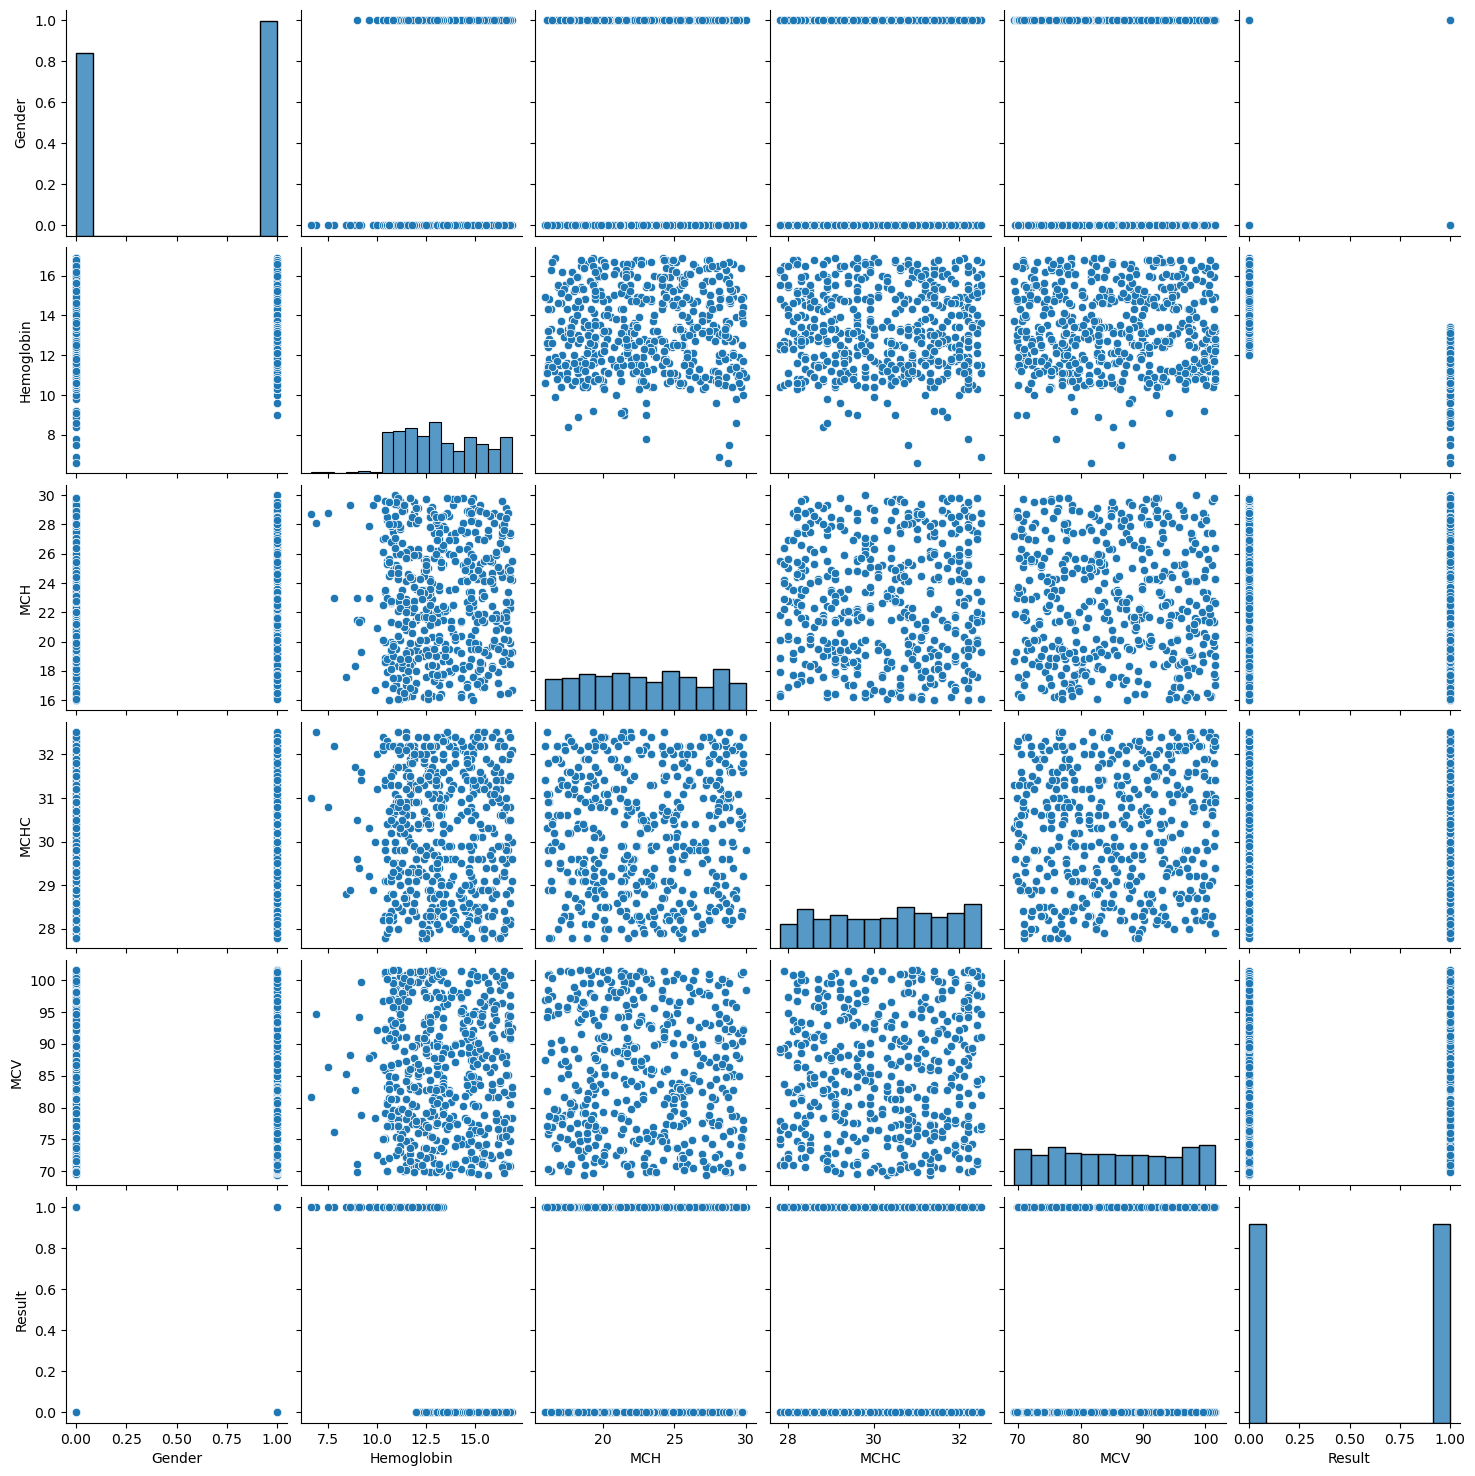

In [14]:
#multivariate analysis
sns.pairplot(df)

In [15]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

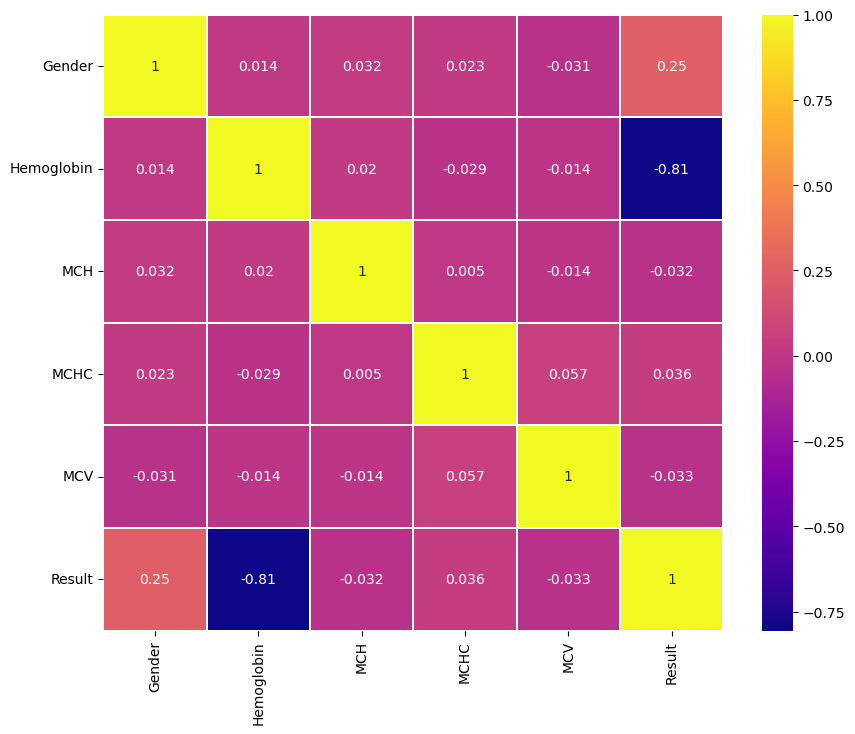

In [16]:
sns.heatmap(df.corr(), annot=True,cmap='plasma', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [17]:
X = df.drop('Result',axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [18]:
Y=df['Result']
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state=20)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [32]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)
acc_gbc = accuracy_score(y_test,y_pred)
c_gbc = classification_report(y_test,y_pred)
print ('Accuracy Score: ' ,acc_gbc)
print(c_gbc)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [33]:
prediction = GBC.predict([[0,11.6,22.3,30.9,74.5]])

C:\Users\hrock\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [34]:
prediction[0]



np.int64(1)

In [35]:
if prediction[0] ==0:
    print("you do not have any Anemic Disease")
elif prediction[0] == 1:
        print(" you have anemic disease")

 you have anemic disease


In [37]:
import joblib
model = GBC 

joblib.dump(model, "model.pkl")


['model.pkl']

In [38]:
from IPython.display import FileLink

FileLink("model.pkl")


C:\Users\hrock\model.pkl

In [1]:
import joblib
model = joblib.load("model.pkl")

print("Model type:", type(model))

# 1) Direct check
if hasattr(model, "feature_names_in_"):
    print("feature_names_in_:", model.feature_names_in_)

# 2) If it's a Pipeline, check the last step
try:
    print("Pipeline final step names:", model[-1].feature_names_in_)
except Exception:
    print("No feature_names_in_ on final step either.")


Model type: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
feature_names_in_: ['Gender' 'Hemoglobin' 'MCH' 'MCHC' 'MCV']
No feature_names_in_ on final step either.


In [1]:
from IPython.display import FileLink

FileLink("model.pkl")

C:\Users\hrock\model.pkl